In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv',low_memory=False)

In [3]:
df.shape

(39717, 111)

## Data cleaning

#### Some column names might have extra space at beginning or end. Lets trim those as a first step.

In [4]:
df.columns = df.columns.str.strip()

#### Lets understand the Null Values present

In [5]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### There are total 39717 values in the data frame but some columns seems to have all the values as null values. <br> We should remove such columns as they won't contribute anything to the analysis

In [6]:
df = df.loc[:,df.isnull().sum() != len(df)]
df.shape

(39717, 57)

In [7]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Now we are left with 57 columns. Lets drop all the columns which contains very high number of null values and seem insignificant for our analysis

In [8]:
col_to_drop = ['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d']
df = df.drop(col_to_drop,axis=1)
df.shape

(39717, 53)

#### So now we are left with 53 columns. Lets now see which columns have just a single value and we can remove such columns since it won't contribute much to analysis

In [9]:
# Check if any column with a less than or equal to one entry present
for column in df.columns:
    if(len(df[column].value_counts()) <= 1):
       print(column)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [10]:
# Now removing the above columns
for column in df.columns:
    if(len(df[column].value_counts()) <= 1):
       df.drop(column,axis=1,inplace=True)

In [11]:
df.shape

(39717, 44)

#### Now we have 44 columns, We should drop all the columns which seem insignificant for our analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [13]:
col_to_drop = ['id','member_id','url','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','issue_d','funded_amnt','funded_amnt_inv']
df.drop(col_to_drop,axis=1,inplace=True)

In [14]:
df.shape

(39717, 26)

#### 26 columns remains and they will probably contribute to analysis.

### Change Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  loan_status           39717 non-null  object 
 12  purpose               39717 non-null  object 
 13  title                 39706 non-null  object 
 14  zip_code              39717 non-null  object 
 15  addr_state         

#### int_rate, emp_length, earliest_cr_line, revol_util should be checked if they can be converted to other useful data types

##### Lets check for int_rate

In [16]:
df.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
17.34%      1
16.71%      1
16.15%      1
18.36%      1
14.67%      1
Name: count, Length: 371, dtype: int64

##### We can remove % and convert to float64

In [17]:
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%','')))
df.int_rate.value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
17.34      1
16.71      1
16.15      1
18.36      1
14.67      1
Name: count, Length: 371, dtype: int64

##### Lets check for emp_length

In [18]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [19]:
df.emp_length.isna().sum()

np.int64(1075)

##### We can convert it to float and represent 10+ years as 15.0 and < 1 year as 0.5 and the null values can be represented as 0.0. Null value rows are not removed to prevent the loss of data.

In [20]:
df.emp_length = df.emp_length.str.rstrip(' year').str.rstrip(' years').str.replace('10+','15').replace('< 1','0.5').str.strip(' ').fillna('0').astype('float')

In [21]:
df.emp_length.value_counts()

emp_length
15.0    8879
0.5     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
0.0     1075
Name: count, dtype: int64

##### Lets check for earliest_cr_line

In [22]:
df.earliest_cr_line.value_counts()

earliest_cr_line
Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Jul-64      1
Apr-66      1
Dec-66      1
Oct-68      1
Oct-74      1
Name: count, Length: 526, dtype: int64

##### We can convert earliest_cr_line to datetime format

In [23]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format='%b-%y')
df.earliest_cr_line.value_counts()

earliest_cr_line
1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
2064-07-01      1
2066-04-01      1
2066-12-01      1
2068-10-01      1
1974-10-01      1
Name: count, Length: 526, dtype: int64

##### Lets check for revol_util 

In [24]:
df.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
0.75%       1
2.64%       1
81.31%      1
26.33%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [25]:
df.revol_util.isna().sum()

np.int64(50)

##### revol_util has some null values and we can remove these small number of rows from our analysis. And then we can convert it to float after removing the % signs.

In [26]:
df = df[~df.revol_util.isna()]

In [27]:
df.revol_util = df.revol_util.apply(lambda x: float(x.replace('%','')))
df.revol_util.value_counts()

revol_util
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
0.75       1
2.64       1
81.31      1
26.33      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [28]:
df.reset_index(inplace=True,drop=True)

#### Now data cleaning has completed. We will move onto analysis part now and derive variables wherever necessary/

## Data Analysis

In [29]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,NaN,15.0,RENT,24000.0,...,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0
1,2500,60 months,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,...,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0
2,2400,36 months,15.96,84.33,C,C5,NaN,15.0,RENT,12252.0,...,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,15.0,RENT,49200.0,...,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,...,17.94,0,1996-01-01,0,15,0,27783,53.9,38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39662,2500,36 months,8.07,78.42,A,A4,FiSite Research,4.0,MORTGAGE,110000.0,...,11.33,0,1990-11-01,0,13,0,7274,13.1,40,NaN
39663,8500,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3.0,RENT,18000.0,...,6.40,1,1986-12-01,1,6,0,8847,26.9,9,NaN
39664,5000,36 months,8.07,156.84,A,A4,NaN,0.5,MORTGAGE,100000.0,...,2.30,0,1998-10-01,0,11,0,9698,19.4,20,NaN
39665,5000,36 months,7.43,155.38,A,A2,NaN,0.5,MORTGAGE,200000.0,...,3.72,0,1988-11-01,0,17,0,85607,0.7,26,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39667 entries, 0 to 39666
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39667 non-null  int64         
 1   term                  39667 non-null  object        
 2   int_rate              39667 non-null  float64       
 3   installment           39667 non-null  float64       
 4   grade                 39667 non-null  object        
 5   sub_grade             39667 non-null  object        
 6   emp_title             37212 non-null  object        
 7   emp_length            39667 non-null  float64       
 8   home_ownership        39667 non-null  object        
 9   annual_inc            39667 non-null  float64       
 10  verification_status   39667 non-null  object        
 11  loan_status           39667 non-null  object        
 12  purpose               39667 non-null  object        
 13  title           

#### Lets Store current dataframe in a backup

In [31]:
df_backup = df

#### We can remove the rows with loan_status = current since we want to analyse only for fully paid and charged off (defaulters)

In [32]:
df = df[df['loan_status'] != 'Current'].reset_index(drop=True)
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,NaN,15.0,RENT,24000.0,...,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0
1,2500,60 months,15.27,59.83,C,C4,Ryder,0.5,RENT,30000.0,...,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0
2,2400,36 months,15.96,84.33,C,C5,NaN,15.0,RENT,12252.0,...,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,15.0,RENT,49200.0,...,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0
4,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,...,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38522,2500,36 months,8.07,78.42,A,A4,FiSite Research,4.0,MORTGAGE,110000.0,...,11.33,0,1990-11-01,0,13,0,7274,13.1,40,NaN
38523,8500,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3.0,RENT,18000.0,...,6.40,1,1986-12-01,1,6,0,8847,26.9,9,NaN
38524,5000,36 months,8.07,156.84,A,A4,NaN,0.5,MORTGAGE,100000.0,...,2.30,0,1998-10-01,0,11,0,9698,19.4,20,NaN
38525,5000,36 months,7.43,155.38,A,A2,NaN,0.5,MORTGAGE,200000.0,...,3.72,0,1988-11-01,0,17,0,85607,0.7,26,NaN


#### Also, lets mention the consumer attributes (ca) and loan attributes (la)

In [33]:
ca = ['emp_title','emp_length','home_ownership','verification_status','annual_inc','purpose','title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','pub_rec_bankruptcies']
la = ['grade','sub_grade','installment','int_rate','term','loan_amnt']

#### Lets also divide our data set into 'defaulters' (charged off) represented by df_def and 'fully paid' represented by df_fp

In [34]:
df_def = df[df['loan_status'] == 'Charged Off']
df_fp = df[df['loan_status'] == 'Fully Paid']

#### Lets start our analysis with loan attributes

##### grades

In [35]:
df_def1 = df_def.grade.value_counts().sort_index()
df_fp1 = df_fp.grade.value_counts().sort_index()
df_grade = pd.DataFrame({'Defaulters':df_def1.values,'Fully Paid':df_fp1.values},df_def1.index)
df_grade

,Defaulters,Fully Paid
grade,,
A,602,9443
B,1425,10249
C,1343,6477
D,1115,3954
E,711,1941
F,316,654
G,99,198


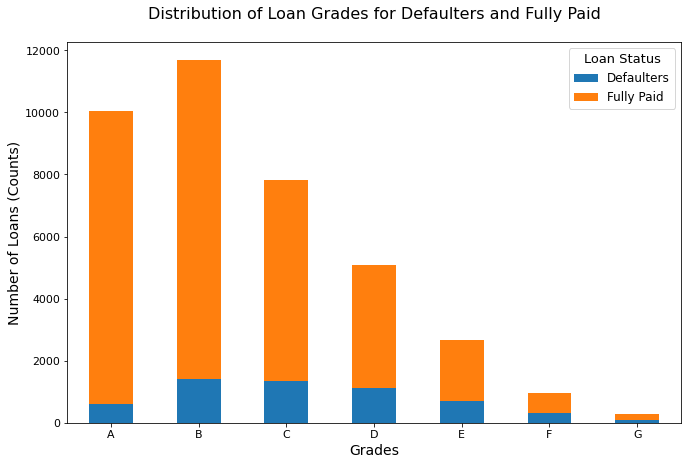

In [36]:
df_grade.plot(kind='bar',stacked=True,figsize=(11,7))
plt.xticks(rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.title('Distribution of Loan Grades for Defaulters and Fully Paid\n', fontsize=16)
plt.ylabel('Number of Loans (Counts)', fontsize=14)
plt.xlabel('Grades', fontsize=14)
plt.legend(title='Loan Status', fontsize=12, title_fontsize='13')

plt.show()

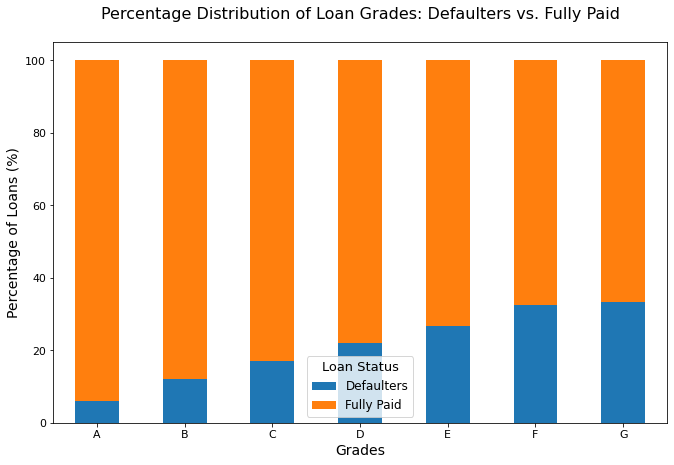

In [37]:
df_grade['Total'] = df_grade.Defaulters + df_grade['Fully Paid']
df_grade = df_grade.apply(lambda x: x.apply(lambda y: y*100/x['Total']) ,axis = 1).drop(['Total'],axis=1)
df_grade.plot(kind='bar',stacked=True,figsize=(11,7))
plt.xticks(rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.title('Percentage Distribution of Loan Grades: Defaulters vs. Fully Paid\n', fontsize=16)
plt.ylabel('Percentage of Loans (%)', fontsize=14)
plt.xlabel('Grades', fontsize=14)
plt.legend(title='Loan Status', fontsize=12, title_fontsize='13')
plt.show()

##### sub_grade

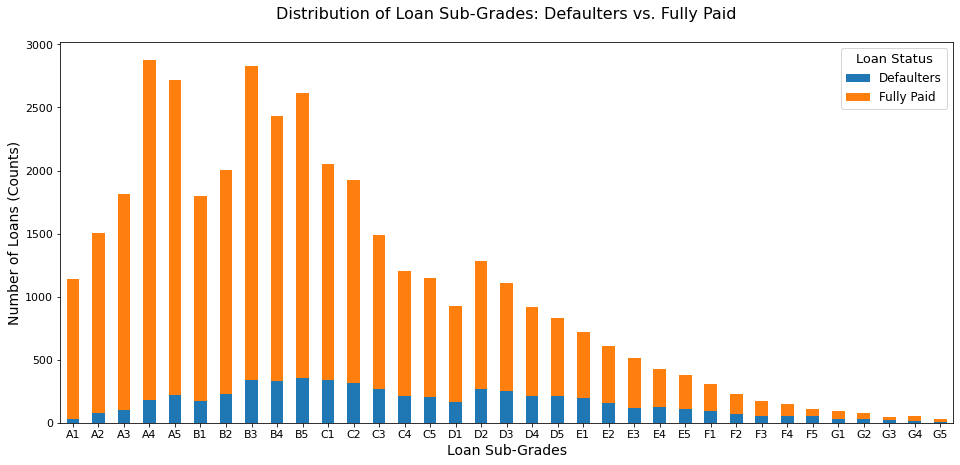

In [38]:
df_def1 = df_def.sub_grade.value_counts().sort_index()
df_fp1 = df_fp.sub_grade.value_counts().sort_index()
df_sub_grade = pd.DataFrame({'Defaulters':df_def1.values,'Fully Paid':df_fp1.values},df_def1.index)
df_sub_grade.plot(kind='bar',stacked=True,figsize=(16,7))
plt.legend(title='Loan Status', fontsize=12, title_fontsize='13')
plt.title('Distribution of Loan Sub-Grades: Defaulters vs. Fully Paid\n', fontsize=16)
plt.ylabel('Number of Loans (Counts)', fontsize=14) 
plt.xlabel('Loan Sub-Grades', fontsize=14)
plt.xticks(rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.show()

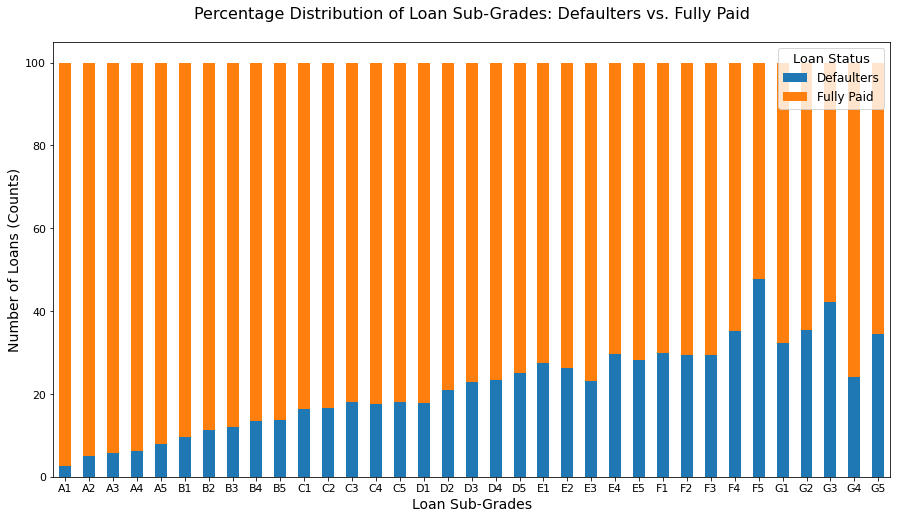

In [39]:
df_sub_grade['Total'] = df_sub_grade.Defaulters + df_sub_grade['Fully Paid']
df_sub_grade = df_sub_grade.apply(lambda x: x.apply(lambda y: y*100/x['Total']) ,axis = 1).drop(['Total'],axis=1)
df_sub_grade.plot(kind='bar',stacked=True,figsize=(15,8))
plt.legend(title='Loan Status', fontsize=12, title_fontsize='13')
plt.title('Percentage Distribution of Loan Sub-Grades: Defaulters vs. Fully Paid\n', fontsize=16)
plt.ylabel('Number of Loans (Counts)', fontsize=14) 
plt.xlabel('Loan Sub-Grades', fontsize=14)
plt.xticks(rotation=0,fontsize=11)
plt.yticks(fontsize=11)
plt.show()

##### installment


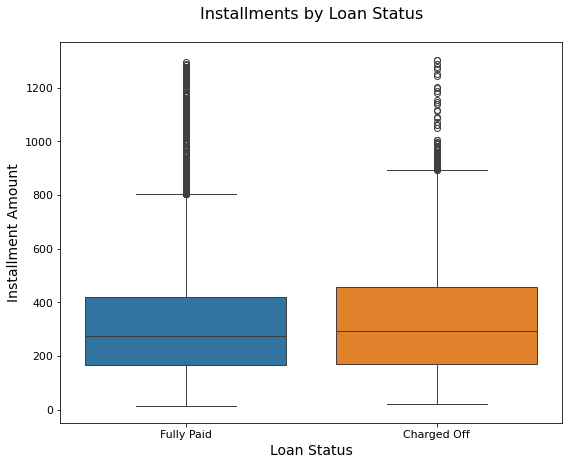

In [40]:
plt.figure(figsize=(9, 7))
sns.boxplot(y=df.installment,hue=df.loan_status,x=df.loan_status)
plt.title('Installments by Loan Status\n', fontsize=16)
plt.ylabel('Installment Amount', fontsize=14)
plt.xlabel('Loan Status', fontsize=14)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.show()

#### From above box plot, we see there are many outliers. Lets remove them.

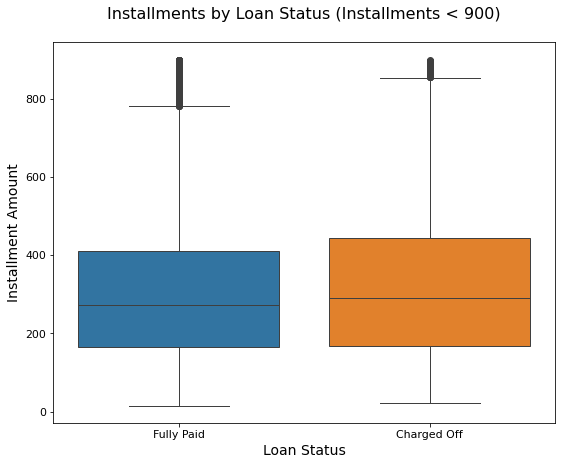

In [41]:
plt.figure(figsize=(9, 7))
sns.boxplot(y=df[df.installment < 900].installment,hue=df.loan_status,x=df.loan_status)
plt.title('Installments by Loan Status (Installments < 900)\n', fontsize=16)
plt.ylabel('Installment Amount', fontsize=14)
plt.xlabel('Loan Status', fontsize=14)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.show()

##### int_rate

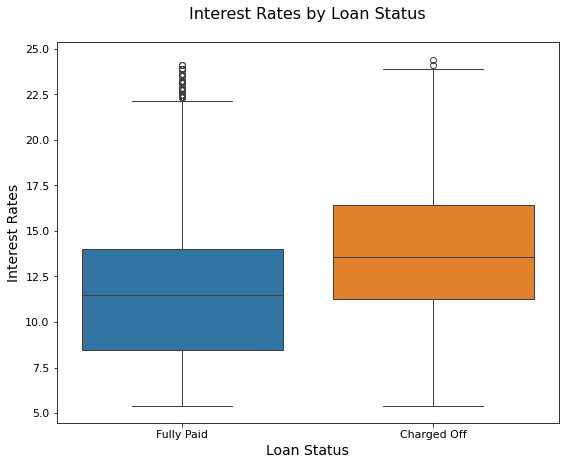

In [42]:
plt.figure(figsize=(9, 7))
sns.boxplot(y=df.int_rate,hue=df.loan_status,x=df.loan_status)
plt.title('Interest Rates by Loan Status\n', fontsize=16)
plt.ylabel('Interest Rates', fontsize=14)
plt.xlabel('Loan Status', fontsize=14)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.show()

In [49]:
df.int_rate.describe()

count    38527.000000
mean        11.927378
std          3.690161
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

##### Lets categorise interest rates to low, medium, high and derive new variable 'ir_cat'.  Since min val is 5.42 and max is 24.4 , we can take bin from 5 to 25.

In [62]:
df['ir_cat'] = pd.cut(df.int_rate,bins=[5.00,9.25,14.54,25],labels=['low','medium','high'])
df1 = pd.pivot_table(df,values='int_rate',index='ir_cat',columns='loan_status',aggfunc='count',fill_value=0,observed=False)

In [63]:
df1

loan_status,Charged Off,Fully Paid
ir_cat,,
low,600,9385
medium,2691,16517
high,2320,7014


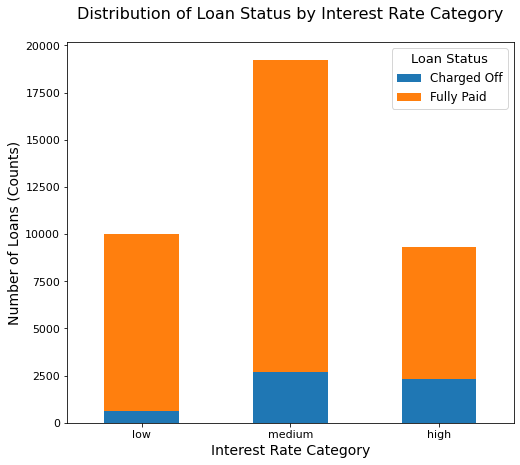

In [68]:
df1.plot(kind='bar',stacked=True,figsize=(8,7))
plt.title('Distribution of Loan Status by Interest Rate Category\n', fontsize=16)
plt.ylabel('Number of Loans (Counts)', fontsize=14)
plt.xlabel('Interest Rate Category', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Loan Status', fontsize=12, title_fontsize=13, loc='upper right')
plt.show()

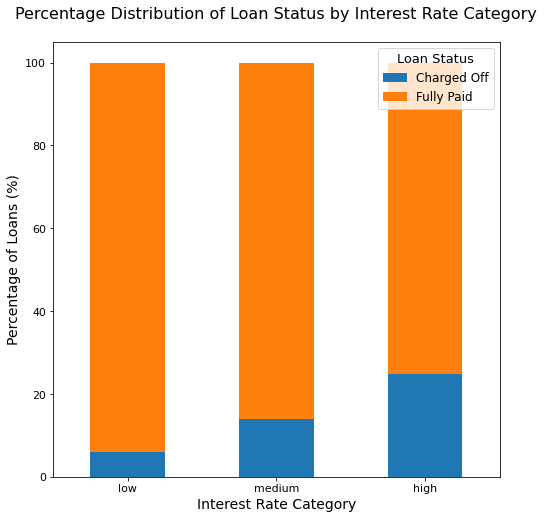

In [70]:
df1['Total'] = df1['Charged Off'] + df1['Fully Paid']
df1 = df1.apply(lambda x: x.apply(lambda y: y*100/x['Total']) ,axis = 1).drop(['Total'],axis=1)
df1.plot(kind='bar',stacked=True,figsize=(8,8))
plt.title('Percentage Distribution of Loan Status by Interest Rate Category\n', fontsize=16)
plt.ylabel('Percentage of Loans (%)', fontsize=14)
plt.xlabel('Interest Rate Category', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Loan Status', fontsize=12, title_fontsize=13, loc='upper right')
plt.show()

In [73]:
df1 = pd.pivot_table( df.groupby(['term','loan_status']).count().reset_index(),values='int_rate',index='term',columns='loan_status',aggfunc='max',fill_value=0)
df1

loan_status,Charged Off,Fully Paid
term,,
36 months,3214,25835
60 months,2397,7081


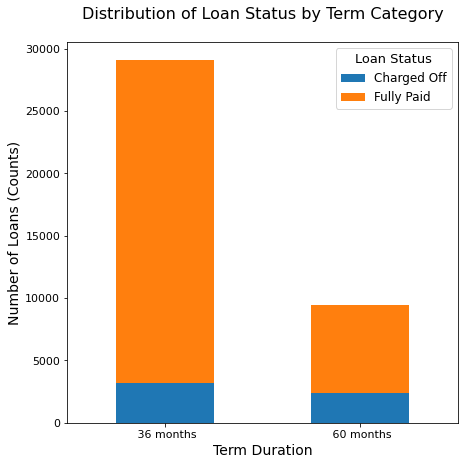

In [84]:
df1.plot(kind='bar',stacked=True,figsize=(7,7))
plt.title('Distribution of Loan Status by Term Category\n', fontsize=16)
plt.ylabel('Number of Loans (Counts)', fontsize=14)
plt.xlabel('Term Duration', fontsize=14)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title='Loan Status', fontsize=12, title_fontsize=13, loc='upper right')
plt.show()


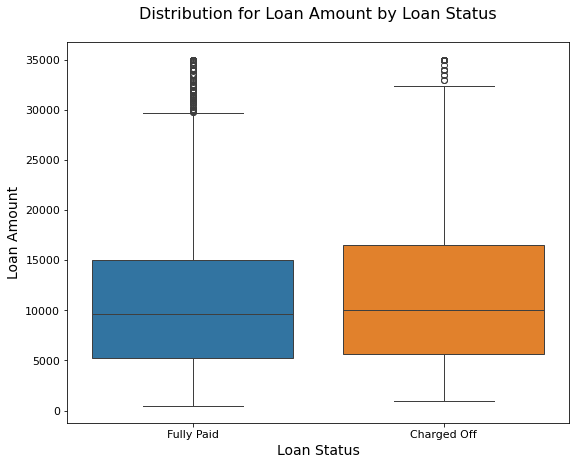

In [89]:
plt.figure(figsize=(9, 7))
sns.boxplot(y=df.loan_amnt,x=df.loan_status, hue=df.loan_status)
plt.title('Distribution for Loan Amount by Loan Status\n', fontsize=16)
plt.ylabel('Loan Amount', fontsize=14)
plt.xlabel('Loan Status', fontsize=14)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.show()

<Axes: xlabel='loan_status', ylabel='annual_inc'>

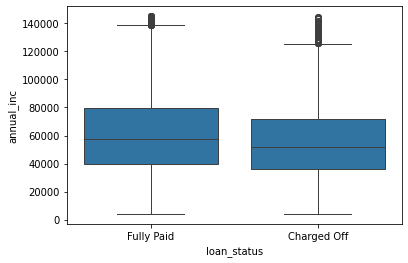

In [45]:
sns.boxplot(y=df[df.annual_inc < 145000].annual_inc,x=df.loan_status)